# **MSP Projekt 2022**
### Daša Nosková - xnosko05
##### Piatok 10:00 


In [1]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

# Úloha 1

IDK ASI ANOVA jednofaktorova podla mesta \\
H0: p1 = p2 = ... = pk = p

# Úloha 2
regresny model sa da zapisat v tvare Y = XB + e.

In [45]:
# data
Z = np.array([-24.62, -17.71, 15.57, 104.46, 22.48, 82.45, 121.34,
              76.68, 110.89, 93.31, 35.83, 87.97, 79.37, 138.35,
              -20.46, 74.53, 74.86, 94.28, 180.71, 101.12, 271.9, 203.8,
              -14.6, 115.39, 156.48, 189.47, 124.65, 366.66, 206.78,
              93.54, 189.22, 201.91, 304.64, 202.01, 367.64, 254.81,
              226.32, 346.02, 390.5, 444.94, 392.08, 424.95, 427.82,
              361.1, 454.58, 515.45, 443.66, 535.12, 551.86, 585.76,
              624.78, 559.12, 571.72, 589.11, 622.54, 706.7, 687.63,
              691.85, 703.73, 751.03, 789.6, 804.41, 806.21, 828.83,
              815.46, 987.89, 856.17, 894.29, 923.28, 940.97])

X = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
              2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22,
              4.44, 4.44, 4.44, 4.44, 4.44, 4.44, 4.44,
              6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67,
              8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89,
              11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11,
              13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33,
              15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56,
              17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78,
              20.00, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00,
              ])

Y = np.array([0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00,
              1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67,
              3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33,
              5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00,
              6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67,
              8.33,10.00,0.00,1.67,3.33,5.00,6.67,8.33,10.00,
              0.00,1.67, 3.33,5.00,6.67,8.33,10.00,0.00,1.67,
              3.33,5.00,6.67,8.33,10.00,0.00,1.67,3.33,5.00,
              6.67,8.33,10.00,
              ])

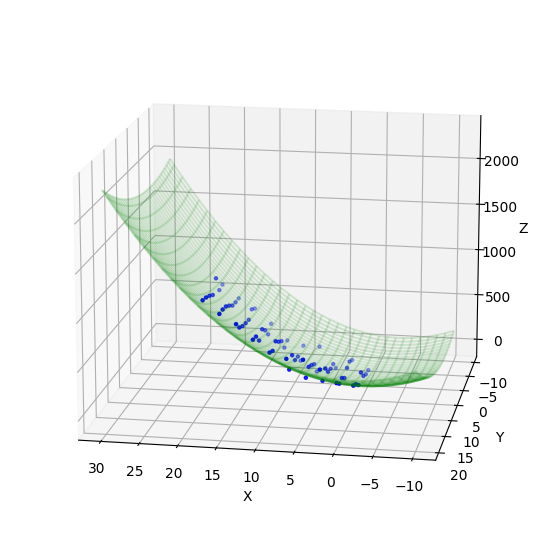

In [51]:
# model Z = B_1 + B_2X + B_3Y + B_4X^2 + B_5Y^2 + B_6XY  
def create_model(*params):
    F = np.column_stack((params))
    F = sm.add_constant(F)
    model = sm.OLS(Z, F).fit()
    #print(model.summary())
    return model

def predict(model, *params):
    predict_values = np.column_stack((params))
    predict_values = sm.add_constant(predict_values)
    z_prediction = model.predict(predict_values)
    z_prediction=np.expand_dims(z_prediction,axis=0)
    return z_prediction



def plot_z(ax, X,Y,Z):
    z = ax.scatter(X, Y, Z, marker='.', color='blue', s=20)
    z.set_label('z')
    ax.view_init(15, 100)
    #return ax

def plot_predicted_z(ax, X,Y, z_prediction):
    pred = ax.scatter(X, Y, z_prediction, c='red', alpha=0.3)
    pred.set_label('predicted')

# todo pouzit lambdu
def z(x, y, coef):
    return (coef[0]+coef[1]*x + coef[2]*y + coef[3]*x**2 + coef[4]*y**2 + coef[5]*x*y)

def plot_surface(ax, model, xx,yy):
    x_surf, y_surf = np.meshgrid(xx, yy)
    z_surf = z(x_surf,y_surf, model.params)
    #ax.plot_surface(x_surf,y_surf,z_surf, color='green', alpha=0.5)
    ax.plot_wireframe(x_surf,y_surf,z_surf, color='green', alpha=0.15,rstride=2, cstride=2,)
    ax.view_init(15, 100)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")


xx = np.linspace(np.min(X)-10, np.max(X) + 10, 70)
yy = np.linspace(np.min(Y)-10, np.max(Y) + 10, 70)

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

model = create_model(X,Y,X**2,Y**2,X*Y)
z_prediction = predict(model, xx, yy, xx**2, yy**2, xx*yy)
plot_z(ax,X,Y,Z)
plot_predicted_z(ax, X,Y, z_predi)

ax_surf = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plot_z(ax_surf,X,Y,Z)
plot_surface(ax_surf, model, xx,yy)
#fig_surf = plt.figure(figsize=(7, 7), dpi=100)
#ax_surf = plt.axes(projection='3d')
#this works

#fig.tight_layout()
#fig.show()
#predict_values = np.column_stack((X, Y, X**2, Y**2, X*Y))

#ax.legend(loc="best")
#ax.draw()